In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
import statistics

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('Lab Session1 Data (ML).xlsx', sheet_name='Purchase data')
df = df.dropna(axis=1)
df

In [101]:
A = df.iloc[:, 1:-1].values
# A
C = df.iloc[:, -1].values

A = np.array(A)
C = np.array(C)


print("Matrix A:")
print(A)
print("Matrix C:")
print(C)
rank = np.linalg.matrix_rank(A)
print("Rank of matrix A: ", rank)



Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:
[386 289 393 110 280 167 271 274 148 198]
Rank of matrix A:  3


In [102]:
# Using Pseudo-Inverse find the cost of each product available for sale.
# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a pseudo-inverse.)

cost_each_product = np.linalg.pinv(A).dot(C)
cost_each_product

array([ 1., 55., 18.])

In [103]:
# Use the Pseudo-inverse to calculate the model vector X
# for predicting the cost of the products available with the vendor

model_Vector_X = A.dot(cost_each_product)
model_Vector_X




array([386., 289., 393., 110., 280., 167., 271., 274., 148., 198.])

In [104]:
df['Category'] = df['Payment (Rs)'] > 200
df['Category'] = df['Category'].replace({True:'RICH', False: 'POOR'})

features = df.iloc[:, 1:-2].values
X_train, X_test, y_train, y_test = train_test_split(features, df['Category'], test_size=0.2, random_state=0)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# df

Accuracy:  1.0


WORKING WITH IRCTC STOCK PRICE


In [105]:
irctc_df = pd.read_excel('Lab Session1 Data.xlsx', sheet_name=1)
# irctc_df

price_data = irctc_df['Price'].tolist()
price_data

mean_price = statistics.mean(price_data)

variance_price = statistics.variance(price_data)

print("Mean: ", mean_price)
print("Variance: ", variance_price)
# irctc_df

Mean:  1560.663453815261
Variance:  58732.365352539186


In [106]:
irctc_df['Day'] = pd.to_datetime(irctc_df['Date'])
irctc_df

wednesday_data = irctc_df[irctc_df['Day'].dt.weekday == 2]['Price'].tolist()

sample_mean = statistics.mean(wednesday_data)
print("Sample Mean for wednesday: ", sample_mean)


Sample Mean for wednesday:  1550.706


In [107]:
irctc_df['Date'] = pd.to_datetime(irctc_df['Date'])

april_data = irctc_df[irctc_df['Date'].dt.month == 4]['Price'].tolist() # 4 -> april
april_sample_mean = statistics.mean(april_data)
print('Sample mean for april: ', april_sample_mean)

Sample mean for april:  1698.9526315789474


In [108]:
chg_per = irctc_df['Chg%']
neg_changes = chg_per.apply(lambda x: x < 0)

prob_of_loss = neg_changes.mean()
print(f"Probability of Making a Loss: {prob_of_loss:.2%}")

Probability of Making a Loss: 49.80%


In [109]:
wednesday_data_new = irctc_df[irctc_df['Day'].dt.weekday == 2]
profit_prob_wed = (wednesday_data_new['Chg%'] > 0).mean()
print(f"Probability of Making a Profit on Wednesdays: {profit_prob_wed:.2%}")

Probability of Making a Profit on Wednesdays: 42.00%


In [110]:
# cond_profit_prob = (wednesday_data_new['Chg%'] > 0).mean() * (wednesday_data_new['Chg%'] > 0.05).mean()
wed_profit_prob = (wednesday_data_new['Chg%'] > 0).mean()
# wed_prob = wednesday_data_new.mean()
# wednesday_data_new




In [111]:
wednesday_data = irctc_df[irctc_df['Day'].dt.weekday == 2]
wednesday_profit_prob = (wednesday_data['Chg%'] > 0).mean()
wednesday_prob = (irctc_df['Day'].dt.weekday == 2).mean()
cond_profit_prob = wednesday_profit_prob / wednesday_prob

# wednesday_data = irctc_df[irctc_df['Day'] == 'Wed']
# wednesday_profit_prob = (wednesday_data['Chg%'] > 0).mean()
# wednesday_prob = (irctc_df['Day'] == 'Wed').mean()
# cond_profit_prob = wednesday_profit_prob / wednesday_prob

cond_profit_prob

2.0916

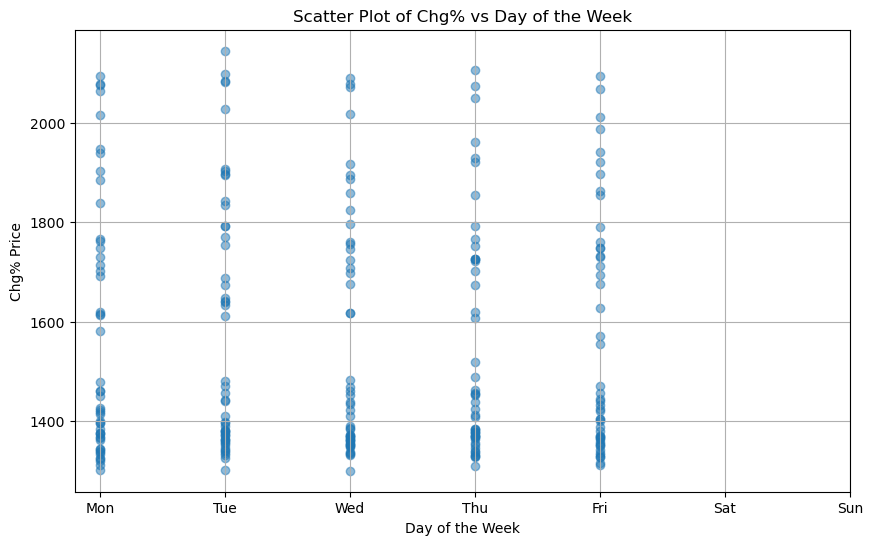

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%,DayOfWeek
0,2021-06-29,Jun,2021-06-29,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020,1
1,2021-06-28,Jun,2021-06-28,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043,0
2,2021-06-25,Jun,2021-06-25,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020,4
3,2021-06-24,Jun,2021-06-24,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026,3
4,2021-06-23,Jun,2021-06-23,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023,2
...,...,...,...,...,...,...,...,...,...,...
244,2020-07-07,Jul,2020-07-07,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024,1
245,2020-07-06,Jul,2020-07-06,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031,0
246,2020-07-03,Jul,2020-07-03,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051,4
247,2020-07-02,Jul,2020-07-02,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362,3


In [122]:
# plotting the graph

irctc_df['DayOfWeek'] = irctc_df['Date'].dt.weekday


#creating a plot

plt.figure(figsize=(10, 6))
plt.scatter(irctc_df['DayOfWeek'], irctc_df['Price'], alpha=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Chg% Price')
plt.title('Scatter Plot of Chg% vs Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)

plt.show()
# irctc_df